In [58]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

In [59]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [60]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [61]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [62]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [63]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tukrah
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | leh
Processing Record 6 of Set 1 | lazaro cardenas
Processing Record 7 of Set 1 | meyungs
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | otradnoye
Processing Record 11 of Set 1 | kashary
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | jaciara
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | sawtell
Processing Record 18 of Set 1 | mudon
Processing Record 19 of Set 1 | manokwari
Processing Record 20 of Set 1 | nandi
Processi

City not found. Skipping...
Processing Record 35 of Set 4 | griffith
Processing Record 36 of Set 4 | kapit
Processing Record 37 of Set 4 | salinas
Processing Record 38 of Set 4 | newtownards
Processing Record 39 of Set 4 | onega
Processing Record 40 of Set 4 | littleton
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | duki
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | hihifo
City not found. Skipping...
Processing Record 47 of Set 4 | palora
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | san policarpo
Processing Record 50 of Set 4 | sovetskoye
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | rorvik
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | pisco
Processing Record 6 of Set 5 | aveiras de cima

Processing Record 21 of Set 8 | tabuk
Processing Record 22 of Set 8 | paddhari
Processing Record 23 of Set 8 | puerto escondido
Processing Record 24 of Set 8 | ewa beach
Processing Record 25 of Set 8 | lolua
City not found. Skipping...
Processing Record 26 of Set 8 | las vegas
Processing Record 27 of Set 8 | ayr
Processing Record 28 of Set 8 | pratapgarh
Processing Record 29 of Set 8 | pierre
Processing Record 30 of Set 8 | tulsipur
Processing Record 31 of Set 8 | ye
City not found. Skipping...
Processing Record 32 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 8 | vanimo
Processing Record 34 of Set 8 | nishihara
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | francavilla al mare
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | calamar
Processing Record 40 of Set 8 | ratnagiri
Processing Record 41 of Set 8 | vestmanna
Processing Record 42 of Set 8 | spiridonovka
Processing Reco

Processing Record 7 of Set 12 | russkiy aktash
Processing Record 8 of Set 12 | calabozo
Processing Record 9 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 10 of Set 12 | muroto
Processing Record 11 of Set 12 | katsuura
Processing Record 12 of Set 12 | yarmouth
Processing Record 13 of Set 12 | buraydah
Processing Record 14 of Set 12 | solnechnyy
Processing Record 15 of Set 12 | ewo
Processing Record 16 of Set 12 | sakakah
Processing Record 17 of Set 12 | basco
Processing Record 18 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 19 of Set 12 | souillac
Processing Record 20 of Set 12 | abu kamal
Processing Record 21 of Set 12 | quang ngai
Processing Record 22 of Set 12 | hohhot
Processing Record 23 of Set 12 | buinsk
Processing Record 24 of Set 12 | la asuncion
Processing Record 25 of Set 12 | sahuaripa
Processing Record 26 of Set 12 | nelson bay
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | cockburn harbour
City n

In [64]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tukrah,32.5341,20.5791,59.29,56,0,17.38,LY,2021-12-06 02:40:13
1,Butaritari,3.0707,172.7902,81.61,79,96,13.67,KI,2021-12-06 02:40:14
2,Mataura,-46.1927,168.8643,56.48,41,77,8.43,NZ,2021-12-06 02:40:14
3,Leh,34.1667,77.5833,17.53,87,93,1.50,IN,2021-12-06 02:40:14
4,Lazaro Cardenas,17.9583,-102.2000,77.11,85,80,4.63,MX,2021-12-06 02:40:15
5,Ushuaia,-54.8000,-68.3000,44.26,65,40,25.32,AR,2021-12-06 02:40:15
6,Barrow,71.2906,-156.7887,15.82,79,90,17.27,US,2021-12-06 02:40:16
7,Otradnoye,59.7775,30.8181,-4.45,97,6,4.76,RU,2021-12-06 02:40:16
8,Kashary,49.0400,41.0056,30.33,95,100,4.63,RU,2021-12-06 02:40:16
9,Albany,42.6001,-73.9662,41.58,52,100,1.99,US,2021-12-06 02:39:39


In [65]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tukrah,LY,32.5341,20.5791,59.29,56,0,17.38
1,Butaritari,KI,3.0707,172.7902,81.61,79,96,13.67
2,Mataura,NZ,-46.1927,168.8643,56.48,41,77,8.43
3,Leh,IN,34.1667,77.5833,17.53,87,93,1.50
4,Lazaro Cardenas,MX,17.9583,-102.2000,77.11,85,80,4.63
5,Ushuaia,AR,-54.8000,-68.3000,44.26,65,40,25.32
6,Barrow,US,71.2906,-156.7887,15.82,79,90,17.27
7,Otradnoye,RU,59.7775,30.8181,-4.45,97,6,4.76
8,Kashary,RU,49.0400,41.0056,30.33,95,100,4.63
9,Albany,US,42.6001,-73.9662,41.58,52,100,1.99


In [66]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [67]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

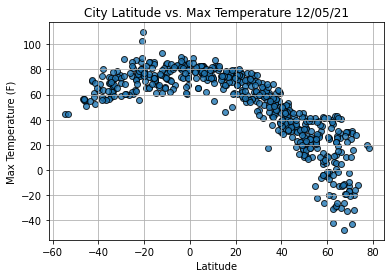

In [68]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


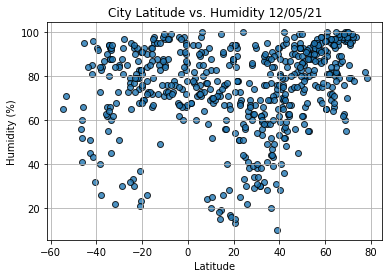

In [69]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

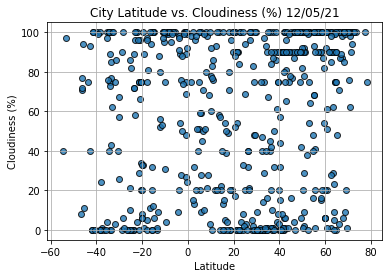

In [70]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


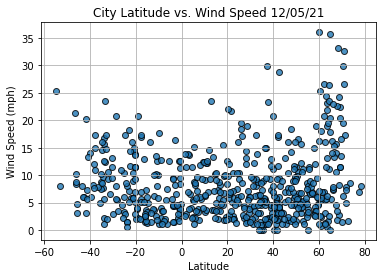

In [71]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [76]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tukrah,LY,32.5341,20.5791,59.29,56,0,17.38
1,Butaritari,KI,3.0707,172.7902,81.61,79,96,13.67
3,Leh,IN,34.1667,77.5833,17.53,87,93,1.50
4,Lazaro Cardenas,MX,17.9583,-102.2000,77.11,85,80,4.63
6,Barrow,US,71.2906,-156.7887,15.82,79,90,17.27
...,...,...,...,...,...,...,...,...
559,Thurso,GB,58.5927,-3.5259,40.95,68,100,18.99
561,Mingshui,CN,36.7167,117.5000,50.59,44,10,9.42
563,La Palma,US,33.8464,-118.0467,68.11,90,1,0.00
564,Bilibino,RU,68.0546,166.4372,-19.30,99,100,3.36


In [78]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tukrah,LY,32.5341,20.5791,59.29,56,0,17.38
1,Butaritari,KI,3.0707,172.7902,81.61,79,96,13.67
3,Leh,IN,34.1667,77.5833,17.53,87,93,1.50
4,Lazaro Cardenas,MX,17.9583,-102.2000,77.11,85,80,4.63
6,Barrow,US,71.2906,-156.7887,15.82,79,90,17.27


In [79]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

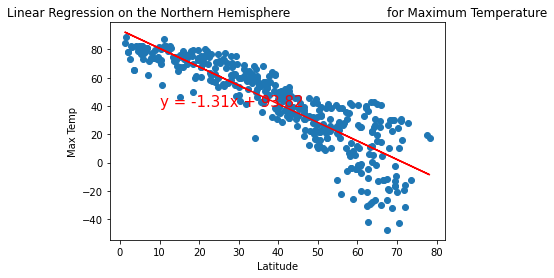

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

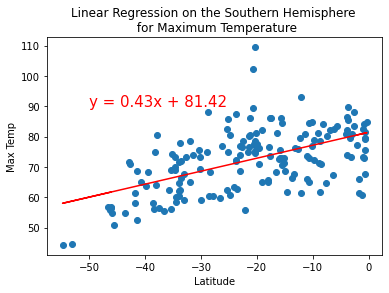

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

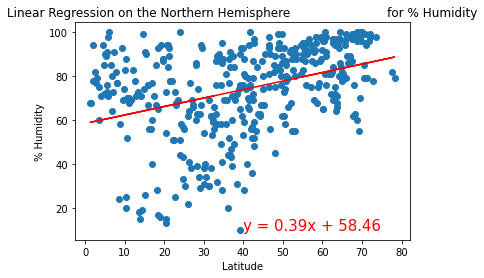

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

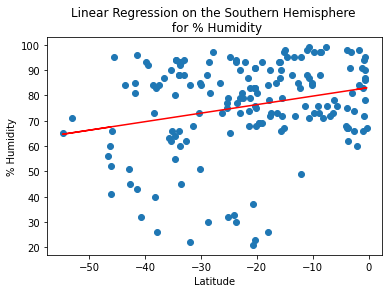

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

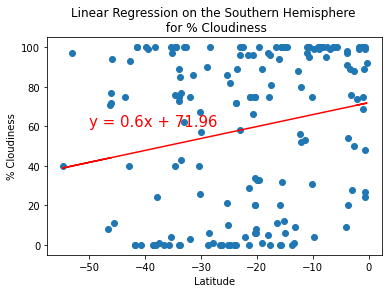

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

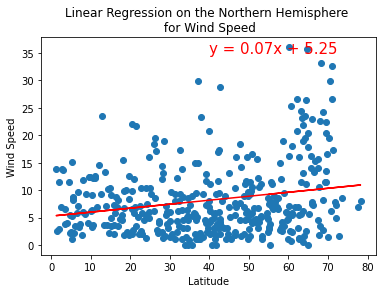

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


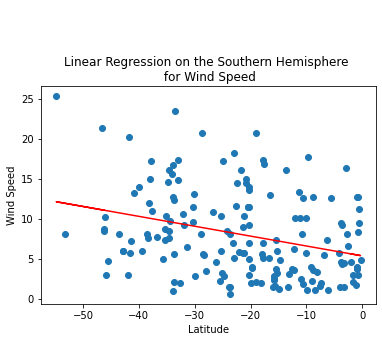

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))